# Soil Moisture Plots smoothed


In [2]:
import csv
import numpy as np
import pandas as pd
# import geopandas as gpd
from IPython.display import Image
# from shapely.geometry import Point, Polygon
from math import factorial

import math
import datetime
from datetime import date
import datetime
import time


import scipy
import os, os.path
import itertools
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.linear_model import LinearRegression
from patsy import cr

# from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sb

import sys


# search path for modules
# look @ https://stackoverflow.com/questions/67631/how-to-import-a-module-given-the-full-path
sys.path.append('/Users/hn/Documents/00_GitHub/Ag/Stop_the_Rot/')
import onion_core as oc
import onion_plot_core as opc

In [3]:
data_dir = "/Users/hn/Documents/01_research_data/Stop_the_Rot/files_from_team/Columbia_Basin_Farm_A_red_onion_data/"
python_data_dir = "/Users/hn/Documents/01_research_data/Stop_the_Rot/Clean_For_Python/"

# Read Soil Moisture data

In [4]:
file_names = ["CLEANED (3) Real Time Soil Moisture data_Field A1.xlsx", 
              "CLEANED (3) Real Time Soil Moisture data_Field A2.xlsx", 
              "CLEANED (3) Real Time Soil Moisture data_Field A3.xlsx", 
              "CLEANED (3) Real Time Soil Moisture data_Field A4.xlsx",
              "CLEANED (3) Real Time Soil Moisture data_Field A5.xlsx"]

In [6]:
A1 = oc.read_xlsx_with_only_1sheet(path_n_fileName = data_dir + file_names[0], head_count=0)
A2 = oc.read_xlsx_with_only_1sheet(path_n_fileName = data_dir + file_names[1], head_count=0)
A3 = oc.read_xlsx_with_only_1sheet(path_n_fileName = data_dir + file_names[2], head_count=0)
A4 = oc.read_xlsx_with_only_1sheet(path_n_fileName = data_dir + file_names[3], head_count=0)
A5 = oc.read_xlsx_with_only_1sheet(path_n_fileName = data_dir + file_names[4], head_count=0)

In [7]:
A1.head(3)

,Date,Sensor1,Sensor2,Sensor3,Sensor4
0,2017-05-12 08:30:12.999997,0.71,0.43,0.34,0.49
1,2017-05-12 09:00:16.000001,0.71,0.43,0.34,0.49
2,2017-05-12 09:30:13.000000,0.71,0.43,0.34,0.49


In [8]:
A1["field"] = "A1"
A2["field"] = "A2"
A3["field"] = "A3"
A4["field"] = "A4"
A5["field"] = "A5"

In [9]:
A1.head(3)

,Date,Sensor1,Sensor2,Sensor3,Sensor4,field
0,2017-05-12 08:30:12.999997,0.71,0.43,0.34,0.49,A1
1,2017-05-12 09:00:16.000001,0.71,0.43,0.34,0.49,A1
2,2017-05-12 09:30:13.000000,0.71,0.43,0.34,0.49,A1


In [10]:
print (min(A1.Date))
print (max(A1.Date))
print ("------------------------")
print (min(A2.Date))
print (max(A2.Date))
print ("------------------------")
print (min(A3.Date))
print (max(A3.Date))
print ("------------------------")
print (min(A4.Date))
print (max(A4.Date))
print ("------------------------")
print (min(A5.Date))
print (max(A5.Date))

2017-05-12 08:30:12.999997
2017-08-23 10:00:12.999997
------------------------
2017-05-12 11:48:54.000003
2017-08-18 10:00:04.000003
------------------------
2017-05-05 14:46:43.999997
2017-08-18 10:00:15.999995
------------------------
2017-05-07 00:00:13.999997
2017-08-23 06:00:13.999997
------------------------
2017-05-05 17:56:41.000004
2017-08-23 08:00:11.999998


In [11]:
v = [1, 2 ,3]
print (min(A1.Date))
print (min(A2.Date))
print (min(A3.Date))
print (min(A4.Date))
print (min(A5.Date))

print ("------------------------")

print (max(A1.Date))
print (max(A2.Date))
print (max(A3.Date))
print (max(A4.Date))
print (max(A5.Date))

2017-05-12 08:30:12.999997
2017-05-12 11:48:54.000003
2017-05-05 14:46:43.999997
2017-05-07 00:00:13.999997
2017-05-05 17:56:41.000004
------------------------
2017-08-23 10:00:12.999997
2017-08-18 10:00:04.000003
2017-08-18 10:00:15.999995
2017-08-23 06:00:13.999997
2017-08-23 08:00:11.999998


In [12]:
# print (A1.Date[3] - A1.Date[2])
# A1["Date_col"] = A1.Date
# A1['Date'] = A1['Date'].dt.date # converts timeStamp to datetime and tosses hour minute.

# Standardize Moistures

In [14]:
A1_std = A1[["Date", "Sensor1", "Sensor2", "Sensor3", "Sensor4", "field"]].copy()
A2_std = A2[["Date", "Sensor1", "Sensor2", "Sensor3", "Sensor4", "field"]].copy()
A3_std = A3[["Date", "Sensor1", "Sensor2", "Sensor3", "Sensor4", "field"]].copy()
A4_std = A4[["Date", "Sensor1", "Sensor2", "Sensor3", "Sensor4", "field"]].copy()
A5_std = A5[["Date", "Sensor1", "Sensor2", "Sensor3", "Sensor4", "field"]].copy()

all_soilMoistures_std = pd.concat([A1_std, A2_std, A3_std, A4_std, A5_std])
    
all_soilMoistures_std = oc.minMax_standardize_soilMoisture(all_soilMoistures_std)
all_soilMoistures_std.head(2)

A1_std = all_soilMoistures_std[all_soilMoistures_std.field == "A1"].copy()
A2_std = all_soilMoistures_std[all_soilMoistures_std.field == "A2"].copy()
A3_std = all_soilMoistures_std[all_soilMoistures_std.field == "A3"].copy()
A4_std = all_soilMoistures_std[all_soilMoistures_std.field == "A4"].copy()
A5_std = all_soilMoistures_std[all_soilMoistures_std.field == "A5"].copy()

# Plot 1 sensor (e.g. sensor 1) of all fields in a subplot. Standardized Version

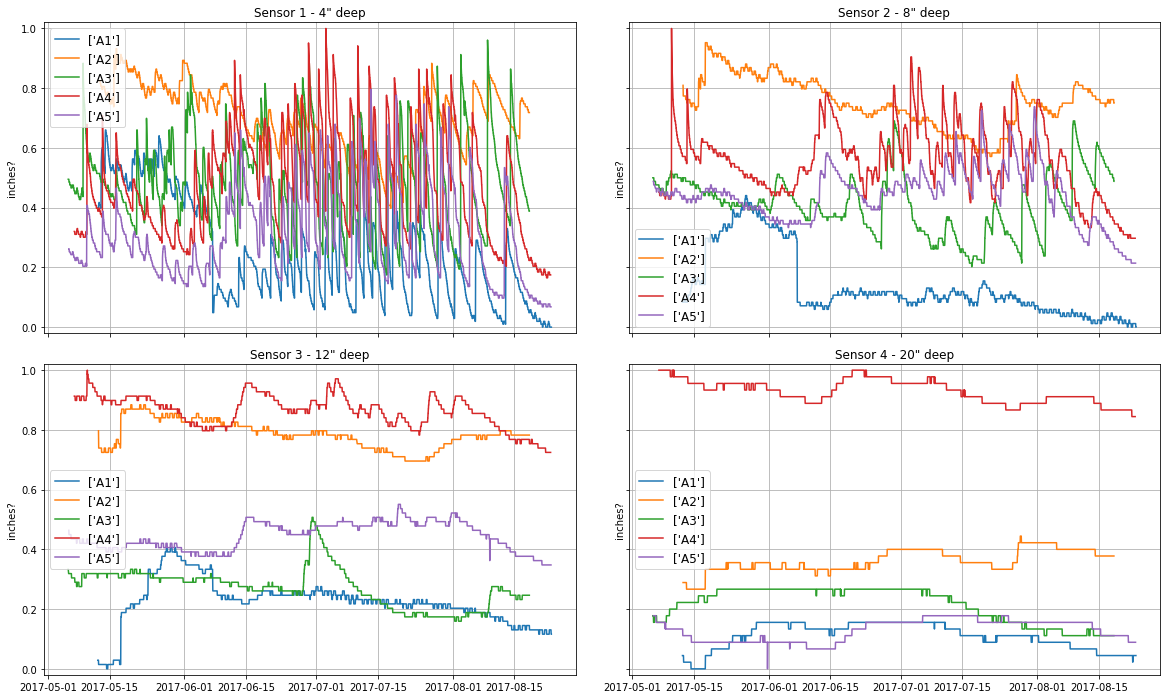

In [15]:
opc.plot_moistures_oneSensorAtaTime(A1_std, A2_std, A3_std, A4_std, A5_std, yLabel = "inches?", xLabel="")

file_name = plot_dir + "04_sensor_readings_per_sensor_STD.png"
# plt.savefig(fname = file_name, dpi=600, bbox_inches='tight')
plt.show()

In [16]:
A1_std.head(2)

,Date,Sensor1,Sensor2,Sensor3,Sensor4,field
0,2017-05-12 08:30:12.999997,0.398058,0.083333,0.028986,0.044444,A1
1,2017-05-12 09:00:16.000001,0.398058,0.083333,0.028986,0.044444,A1


In [17]:
A1_std.shape

(4943, 6)

# Smooth the data of sensor 1 (and 2?)

In [95]:
def smooth_sensors_sum_window(aDT, column_to_smooth = "Sensor1", window_size=7):
    new_col_name = column_to_smooth + "_smoothed"
    mylist = list(aDT[column_to_smooth].values)
    cumsum, moving_aves = [0], []

    for ii, x in enumerate(mylist, 1):
        cumsum.append(cumsum[ii - 1] + x)
        if ii >= window_size:
            moving_ave = (cumsum[ii] - cumsum[ii - window_size])/window_size
            # can do stuff with moving_ave here
            moving_aves.append(moving_ave)

    aDT[new_col_name] = aDT[column_to_smooth].values
    start = int(window_size / 2)
    end = len(aDT.index) - int(window_size / 2) - 1
    aDT.loc[start: end, new_col_name] = moving_aves
    return(aDT)


# Detect the length of one of the peak_to_min in A4

In [20]:
print (type(A4_std.Date[0]))
print (A4_std.Date[0])

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2017-05-07 00:00:13.999997


In [27]:
min_date = pd.Timestamp(year = 2017, month = 5, day = 15, hour=0)
max_date = pd.Timestamp(year = 2017, month = 6, day = 1, hour=0)
A4_May_June = A4_std[A4_std.Date >= min_date].copy()
A4_May_June = A4_May_June[A4_May_June.Date <= max_date].copy()

(4813, 6)
(816, 6)


In [88]:
A4_May_June[A4_May_June.Sensor1 == np.max(A4_May_June.Sensor1)]

,Date,Sensor1,Sensor2,Sensor3,Sensor4,field
456,2017-05-16 12:00:17.000003,0.650485,0.559524,0.884058,0.955556,A4
457,2017-05-16 12:30:13.000000,0.650485,0.559524,0.884058,0.955556,A4
458,2017-05-16 13:00:12.999997,0.650485,0.571429,0.884058,0.955556,A4


In [86]:
A4_May_June.loc[630:640]

,Date,Sensor1,Sensor2,Sensor3,Sensor4,field
630,2017-05-20 03:00:14.999999,0.398058,0.583333,0.913043,0.933333,A4
631,2017-05-20 03:30:14.999996,0.398058,0.583333,0.913043,0.955556,A4
632,2017-05-20 04:00:15.000002,0.398058,0.583333,0.913043,0.955556,A4
633,2017-05-20 04:30:16.000001,0.398058,0.583333,0.913043,0.955556,A4
634,2017-05-20 05:00:15.999998,0.388350,0.583333,0.913043,0.955556,A4
635,2017-05-20 05:30:15.999995,0.388350,0.583333,0.913043,0.955556,A4
636,2017-05-20 06:00:16.000001,0.398058,0.571429,0.913043,0.955556,A4
637,2017-05-20 06:30:14.999996,0.466019,0.571429,0.913043,0.955556,A4
638,2017-05-20 07:00:15.000002,0.485437,0.571429,0.913043,0.955556,A4
639,2017-05-20 07:30:14.999999,0.495146,0.571429,0.913043,0.955556,A4


In [93]:
sensor1_maxValue_time =  pd.Timestamp(year = 2017, month = 5, day = 16, hour=13)
sensor1_minValue_time =  pd.Timestamp(year = 2017, month = 5, day = 20, hour=6)
sensor1_minValue_time - sensor1_maxValue_time

Timedelta('3 days 17:00:00')

# Smooth by a window of size 4 days (95 hours <- keep it odd)

In [120]:
A1_std = smooth_sensors_sum_window(aDT = A1_std, column_to_smooth = "Sensor1", window_size = 95)
A2_std = smooth_sensors_sum_window(aDT = A2_std, column_to_smooth = "Sensor1", window_size = 95)
A3_std = smooth_sensors_sum_window(aDT = A3_std, column_to_smooth = "Sensor1", window_size = 95)
A4_std = smooth_sensors_sum_window(aDT = A4_std, column_to_smooth = "Sensor1", window_size = 95)
A5_std = smooth_sensors_sum_window(aDT = A5_std, column_to_smooth = "Sensor1", window_size = 95)

In [121]:
A1_std = smooth_sensors_sum_window(aDT = A1_std, column_to_smooth = "Sensor2", window_size = 95)
A2_std = smooth_sensors_sum_window(aDT = A2_std, column_to_smooth = "Sensor2", window_size = 95)
A3_std = smooth_sensors_sum_window(aDT = A3_std, column_to_smooth = "Sensor2", window_size = 95)
A4_std = smooth_sensors_sum_window(aDT = A4_std, column_to_smooth = "Sensor2", window_size = 95)
A5_std = smooth_sensors_sum_window(aDT = A5_std, column_to_smooth = "Sensor2", window_size = 95)

In [122]:
A1_std.head(2)

,Date,Sensor1,Sensor2,Sensor3,Sensor4,field,Sensor1_smoothed,Sensor2_smoothed
0,2017-05-12 08:30:12.999997,0.398058,0.083333,0.028986,0.044444,A1,0.398058,0.083333
1,2017-05-12 09:00:16.000001,0.398058,0.083333,0.028986,0.044444,A1,0.398058,0.083333


In [125]:
field_1 = A1_std.copy()
field_2 = A2_std.copy()
field_3 = A3_std.copy()
field_4 = A4_std.copy()
field_5 = A5_std.copy()

yLabel = "inches"
xLabel = ""
y_limits=[-0.02, 1.02]

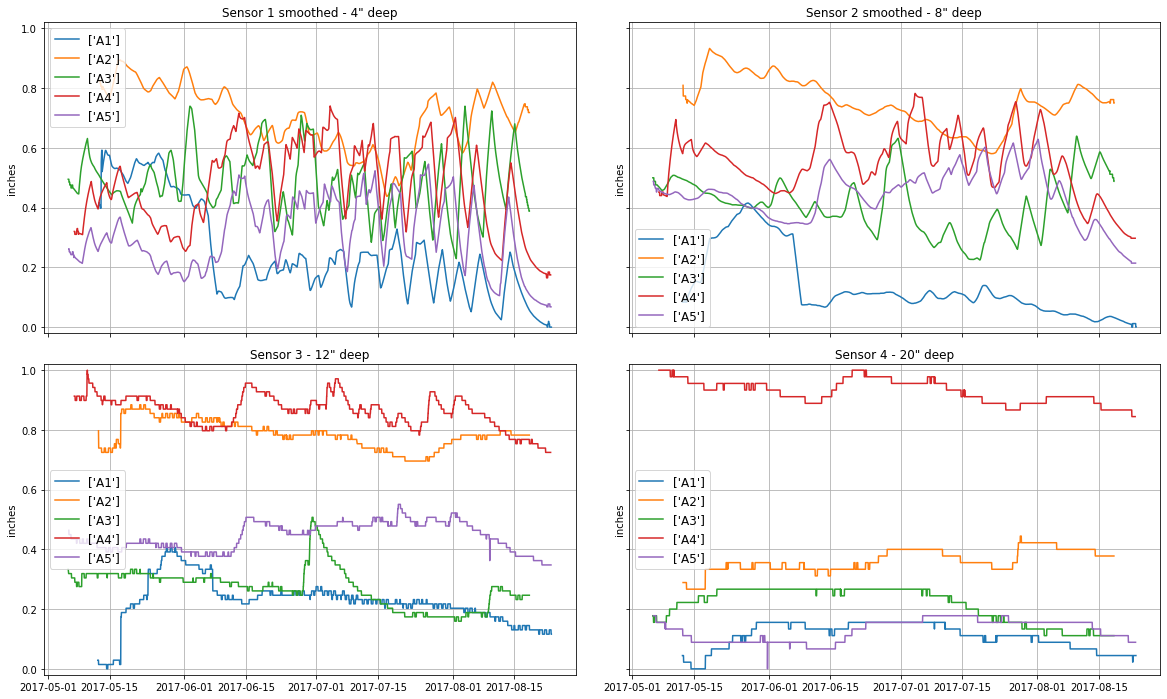

In [129]:
fig, axs = plt.subplots(2, 2, figsize=(20,12),
                        sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0.1, 'wspace': .1});

(ax1, ax2), (ax3, ax4) = axs;
ax1.grid(True); ax2.grid(True); ax3.grid(True); ax4.grid(True);

ax1.plot(field_1.Date.values, field_1.Sensor1_smoothed.values, label = field_1.field.unique())
ax1.plot(field_2.Date.values, field_2.Sensor1_smoothed.values, label = field_2.field.unique())
ax1.plot(field_3.Date.values, field_3.Sensor1_smoothed.values, label = field_3.field.unique())
ax1.plot(field_4.Date.values, field_4.Sensor1_smoothed.values, label = field_4.field.unique())
ax1.plot(field_5.Date.values, field_5.Sensor1_smoothed.values, label = field_5.field.unique())
ax1.legend(loc="best", fontsize=12);
ax1.set_title("Sensor 1 smoothed - 4\" deep");
if len(yLabel)>0 and len(xLabel)>0:
    ax1.set(xlabel=xLabel, ylabel=yLabel)
elif len(yLabel) > 0:
    ax1.set(ylabel=yLabel)
elif len(xLabel) > 0:
    ax1.set(xlabel=xLabel)
ax1.set_ylim(y_limits)


ax2.plot(field_1.Date.values, field_1.Sensor2_smoothed.values, label= field_1.field.unique())
ax2.plot(field_2.Date.values, field_2.Sensor2_smoothed.values, label= field_2.field.unique())
ax2.plot(field_3.Date.values, field_3.Sensor2_smoothed.values, label= field_3.field.unique())
ax2.plot(field_4.Date.values, field_4.Sensor2_smoothed.values, label= field_4.field.unique())
ax2.plot(field_5.Date.values, field_5.Sensor2_smoothed.values, label= field_5.field.unique())
ax2.legend(loc="best", fontsize=12);
ax2.set_title("Sensor 2 smoothed - 8\" deep");
if len(yLabel)>0 and len(xLabel)>0:
    ax2.set(xlabel=xLabel, ylabel=yLabel)
elif len(yLabel) > 0:
    ax2.set( ylabel=yLabel)
elif len(xLabel) > 0:
    ax2.set(xlabel=xLabel)
ax2.set_ylim(y_limits)


ax3.plot(field_1.Date.values, field_1.Sensor3.values, label = field_1.field.unique())
ax3.plot(field_2.Date.values, field_2.Sensor3.values, label = field_2.field.unique())
ax3.plot(field_3.Date.values, field_3.Sensor3.values, label = field_3.field.unique())
ax3.plot(field_4.Date.values, field_4.Sensor3.values, label = field_4.field.unique())
ax3.plot(field_5.Date.values, field_5.Sensor3.values, label = field_5.field.unique())
ax3.legend(loc="best", fontsize=12);
ax3.set_title("Sensor 3 - 12\" deep");
# ax3.ylim = (0, 1.2)
if len(yLabel)>0 and len(xLabel)>0:
    ax3.set(xlabel=xLabel, ylabel=yLabel)
elif len(yLabel) > 0:
    ax3.set(ylabel=yLabel)
elif len(xLabel) > 0:
    ax3.set(xlabel=xLabel)
ax3.set_ylim(y_limits)


ax4.plot(field_1.Date.values, field_1.Sensor4.values, label = field_1.field.unique())
ax4.plot(field_2.Date.values, field_2.Sensor4.values, label = field_2.field.unique())
ax4.plot(field_3.Date.values, field_3.Sensor4.values, label = field_3.field.unique())
ax4.plot(field_4.Date.values, field_4.Sensor4.values, label = field_4.field.unique())
ax4.plot(field_5.Date.values, field_5.Sensor4.values, label = field_5.field.unique())
ax4.legend(loc="best", fontsize=12);
ax4.set_title("Sensor 4 - 20\" deep");
# ax4.ylim = (0, 1.2)
if len(yLabel)>0 and len(xLabel)>0:
    ax4.set(xlabel=xLabel, ylabel=yLabel)
elif len(yLabel) > 0:
    ax4.set(ylabel=yLabel)
elif len(xLabel) > 0:
    ax4.set(xlabel=xLabel)
ax4.set_ylim(y_limits)


plot_dir = "/Users/hn/Documents/01_research_data/Stop_the_Rot/Meeting_Materials/02_04_2021/"
file_name = plot_dir + "04_sensor_readings_per_sensor_STD_smoothed.png"
plt.savefig(fname = file_name, dpi=600, bbox_inches='tight')
